<a href="https://colab.research.google.com/github/itsmechand/TechnoHacks-DS/blob/main/Task4_Fraud_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('task4_creditcard.csv')

In [43]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47622,43281,1.468348,-1.140941,0.372482,-1.452282,-1.395891,-0.350258,-1.126791,0.032524,-1.582322,...,-0.461170,-1.053703,0.206816,-0.383795,0.038269,-0.424625,0.039344,0.020000,24.95,0.0
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0
47627,43282,1.121749,-0.208202,0.660816,0.857988,-0.823614,-0.422509,-0.286708,0.098616,0.541126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(47628, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,47419.0,28178.916025,12997.311062,0.000000,20488.000000,32922.000000,38227.000000,43282.000000
V1,47419.0,-0.236195,1.878798,-56.407510,-0.986651,-0.246674,1.156730,1.960497
V2,47419.0,0.016845,1.624164,-72.715728,-0.552436,0.084019,0.733695,18.183626
V3,47419.0,0.695367,1.519359,-32.965346,0.220704,0.800596,1.432355,4.101716
V4,47419.0,0.188464,1.402795,-5.172595,-0.716902,0.191927,1.066648,16.491217
V5,47419.0,-0.248140,1.412780,-42.147898,-0.855089,-0.281146,0.287205,34.801666
V6,47419.0,0.101228,1.311020,-26.160506,-0.638050,-0.153636,0.490919,22.529298
V7,47419.0,-0.118754,1.281922,-26.548144,-0.600351,-0.074508,0.426685,36.677268
V8,47419.0,0.052714,1.212067,-41.484823,-0.147038,0.056709,0.328259,20.007208
V9,47419.0,0.138969,1.214016,-9.283925,-0.599968,0.024142,0.837028,10.392889


In [9]:
data.describe

<bound method NDFrame.describe of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
47623  43281 -0.696585  1.108944  1.413769 -0.127104  0.018555 -0.455078   
47624  43282 -0.282262 -1.212401  2.174897 -0.181501 -1.604027 -0.332694   
47625  43282 -1.513495 -0.206282 -0.702405  1.056423  1.058711 -0.708973   
47626  43282 -0.659193  1.270953  0.946464 -0.370180  1.619207 -0.288297   
47627  43282  1.121749 -0.208202  0.660816  0.857988 -0.823614 -0.422509   

             V7        V8        V9  ...       V21   

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
Fraud = data[data["Class"] == 1]
Normal = data[data["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)

(146, 31)
(47481, 31)


In [12]:
data['Class'].value_counts()

0.0    47481
1.0      146
Name: Class, dtype: int64

In [13]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.69 % of the dataset
Frauds 0.31 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

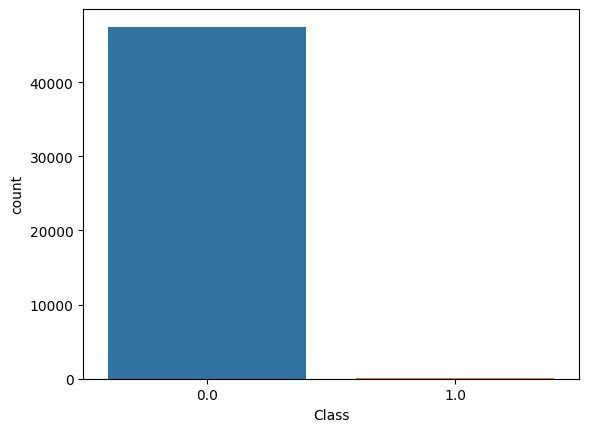

In [14]:
sns.countplot(data=data, x='Class')

In [15]:
data.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47624,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [17]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
47623    False
47624    False
47625    False
47626    False
47627    False
Length: 47628, dtype: bool

In [18]:
data = data.dropna(axis = 0)
data = data.drop_duplicates()

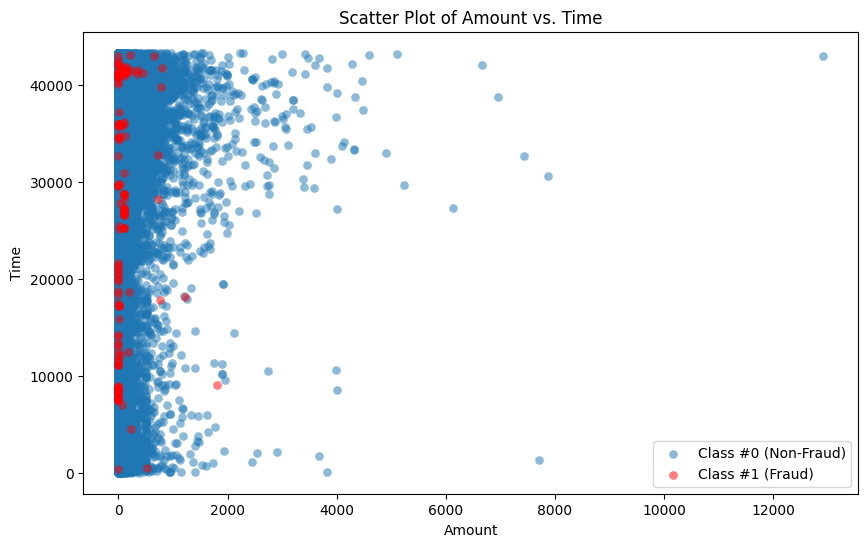

In [19]:
# Separate features (X) and target variable (y)
X = data[['Amount', 'Time']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter Plot of Amount vs. Time')
plt.legend()
plt.show()

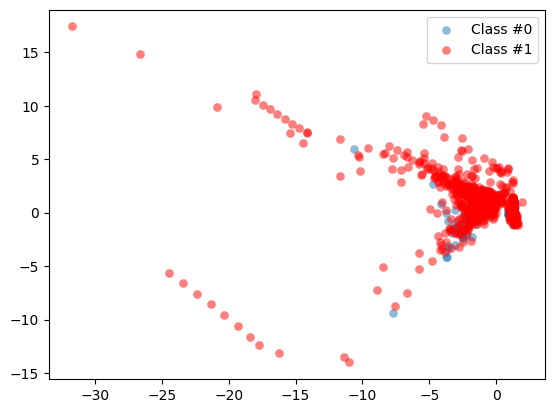

In [20]:
def prep_data(df):
    X = df.iloc[:, 1:28]
    X = np.array(X).astype(float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(float)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15)
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

X, y = prep_data(data)

plot_data(X,y)

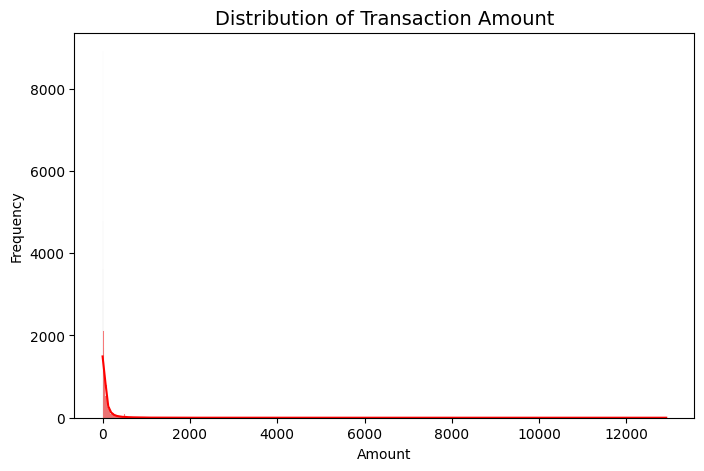

In [21]:
# Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(data['Amount'], color='r', kde=True)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

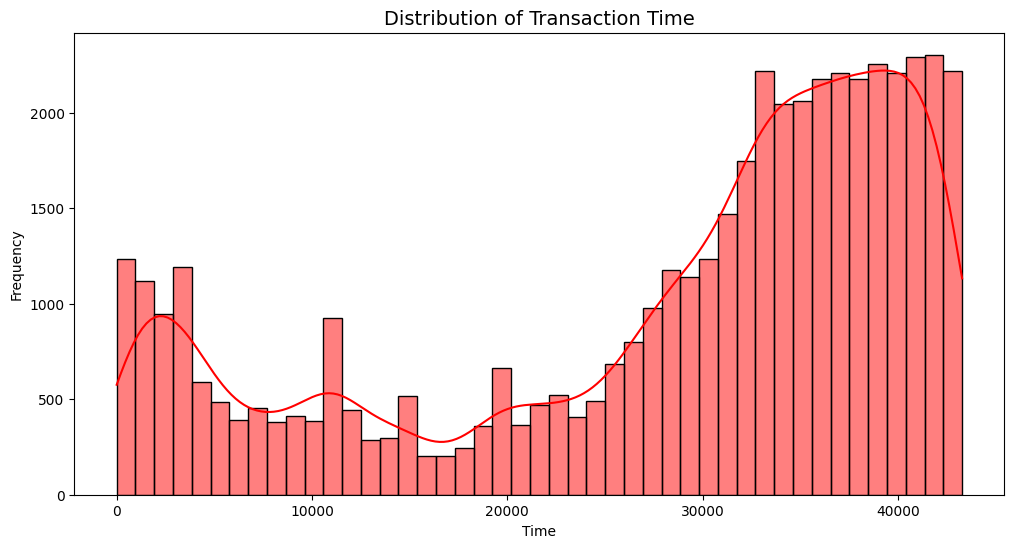

In [45]:
#Distribution of Transaction Time
plt.figure(figsize=(12, 6))
sns.histplot(data['Time'], color='r', kde=True)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<Axes: >

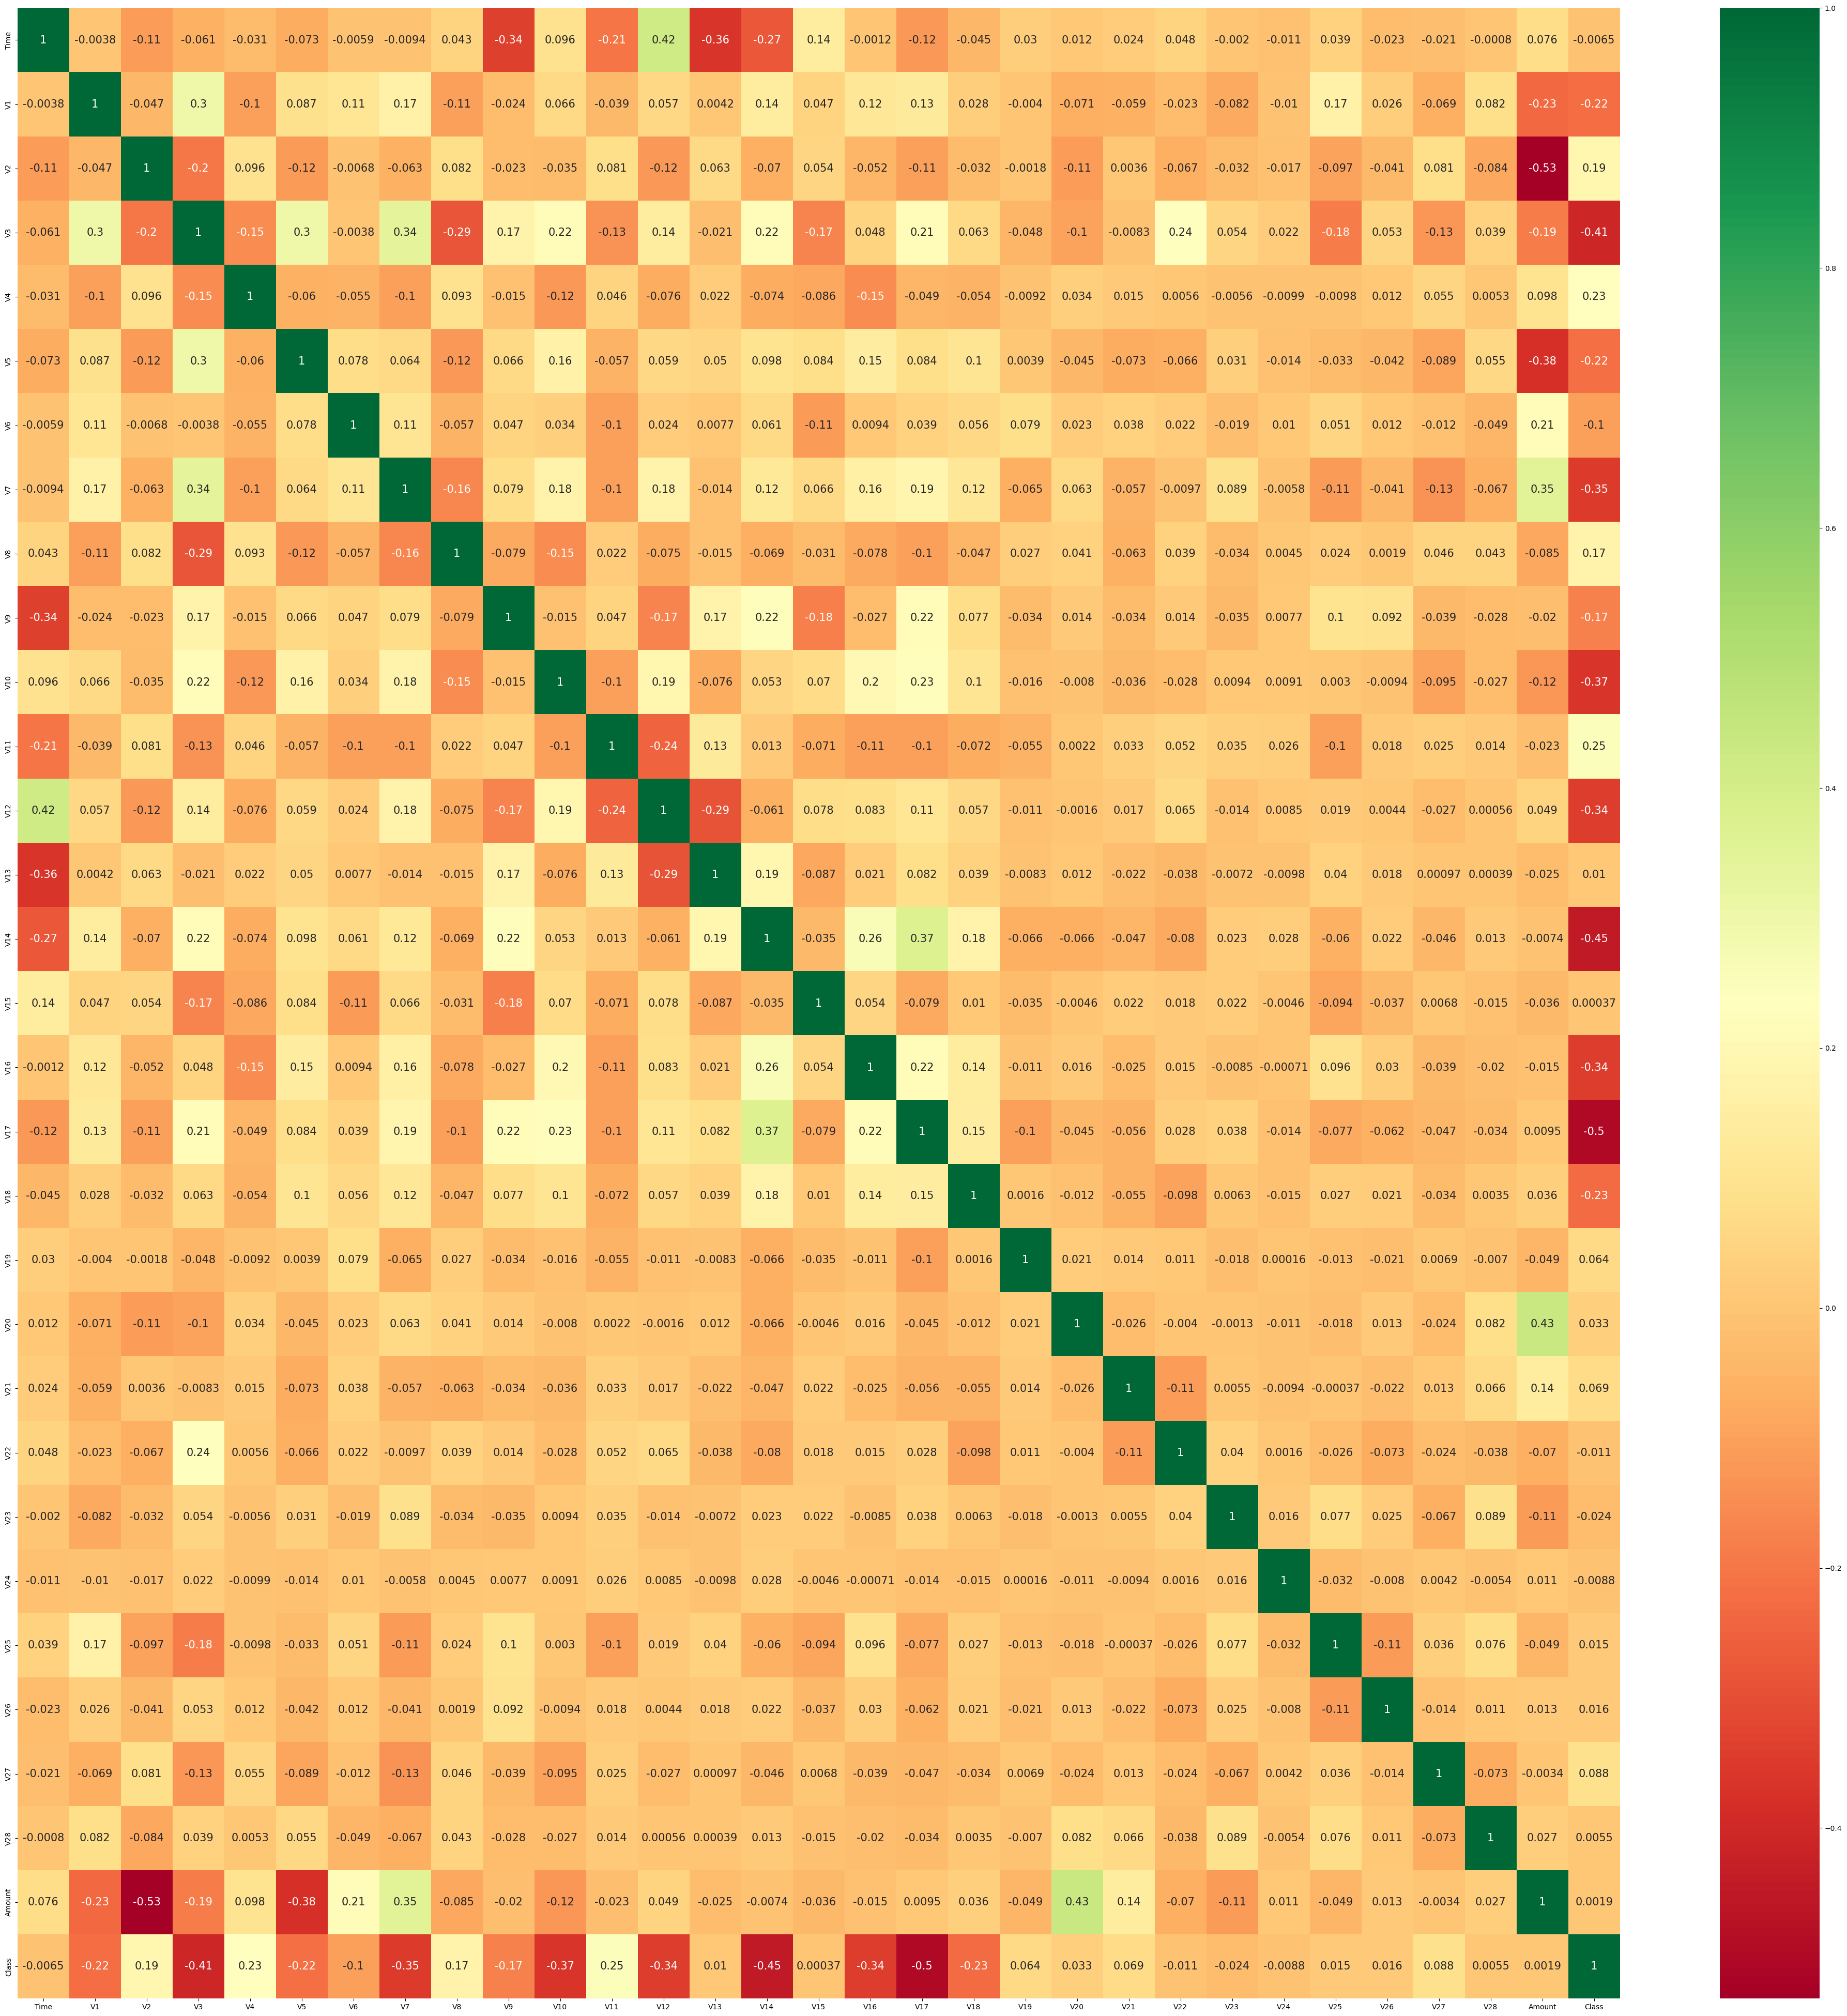

In [23]:
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

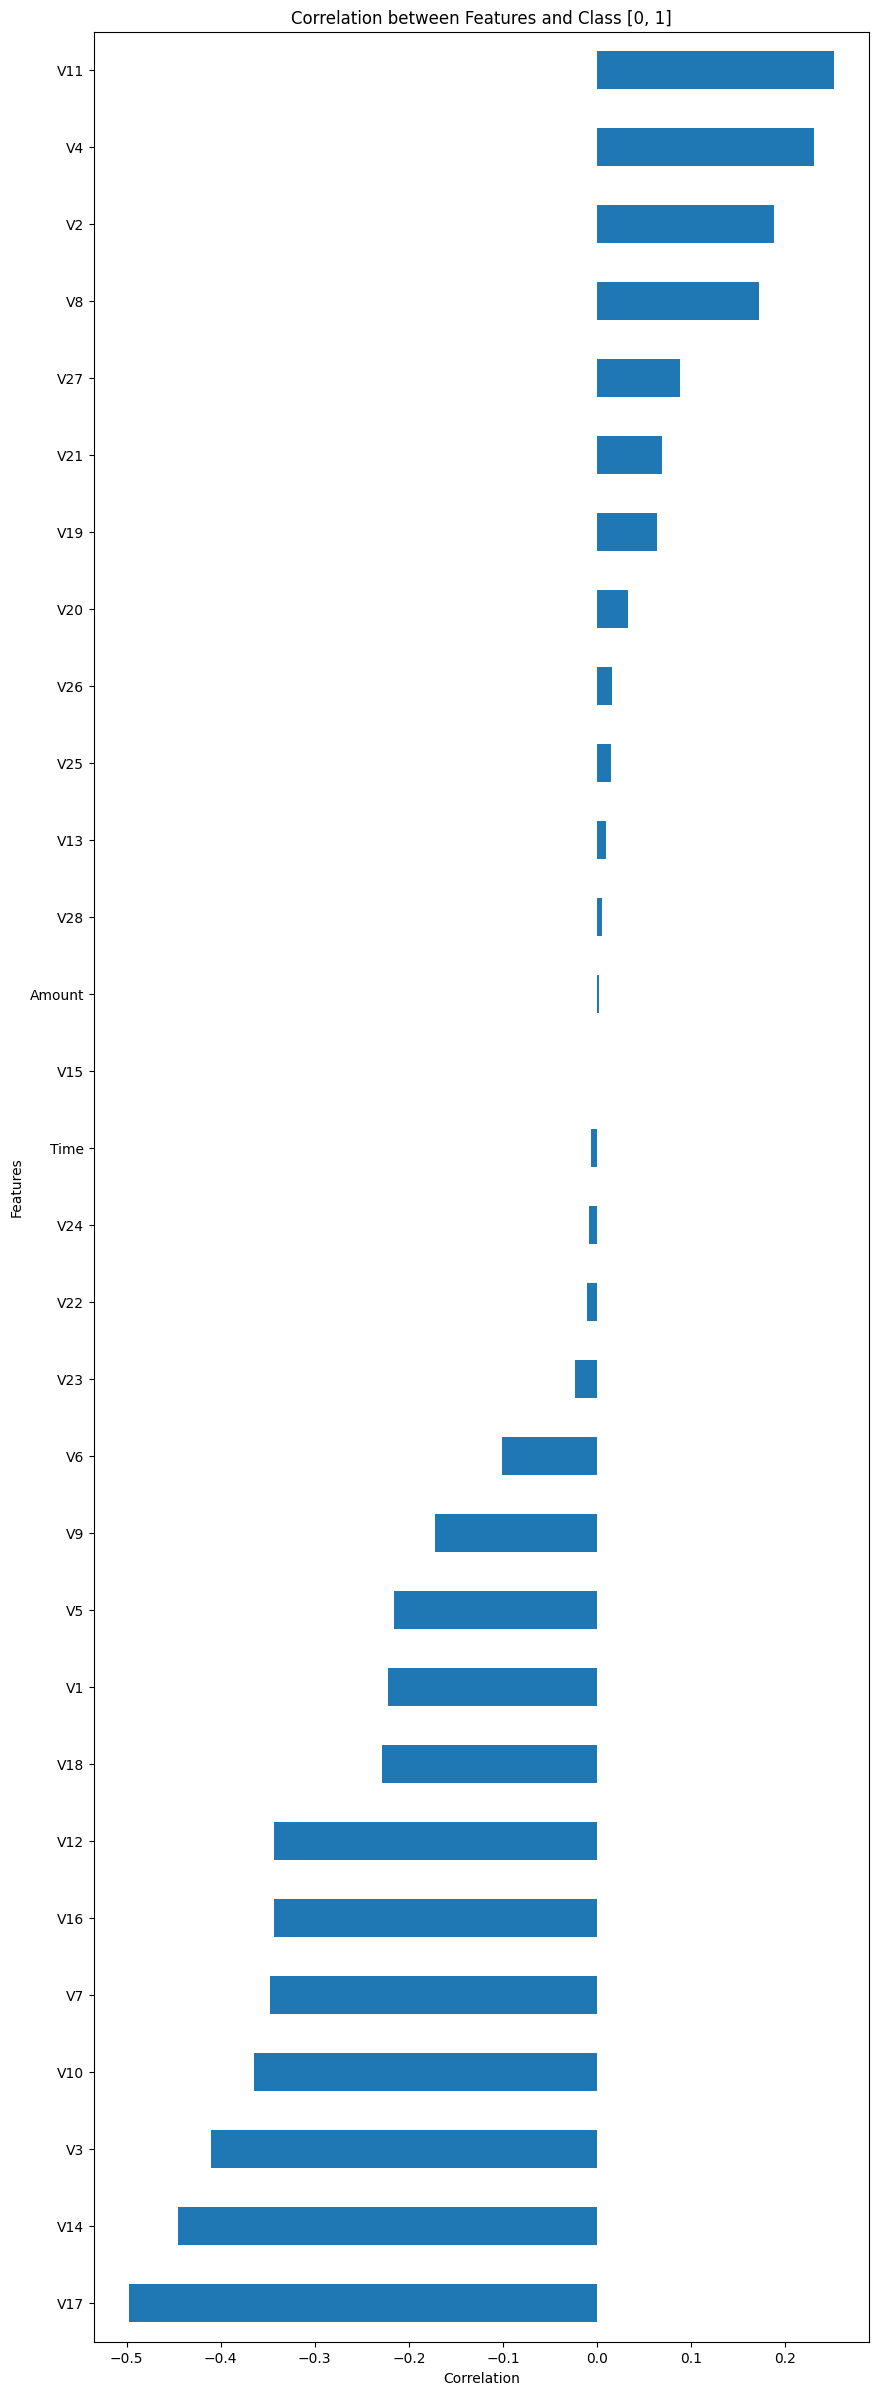

In [24]:
# Calculate the correlation between features and Attrition
feature_correlation = data.drop('Class', axis=1).corrwith(data.Class).sort_values()

# Plot the correlation as a horizontal bar plot
plt.figure(figsize=(10, 30))
feature_correlation.plot(kind='barh')
plt.title('Correlation between Features and Class [0, 1]')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

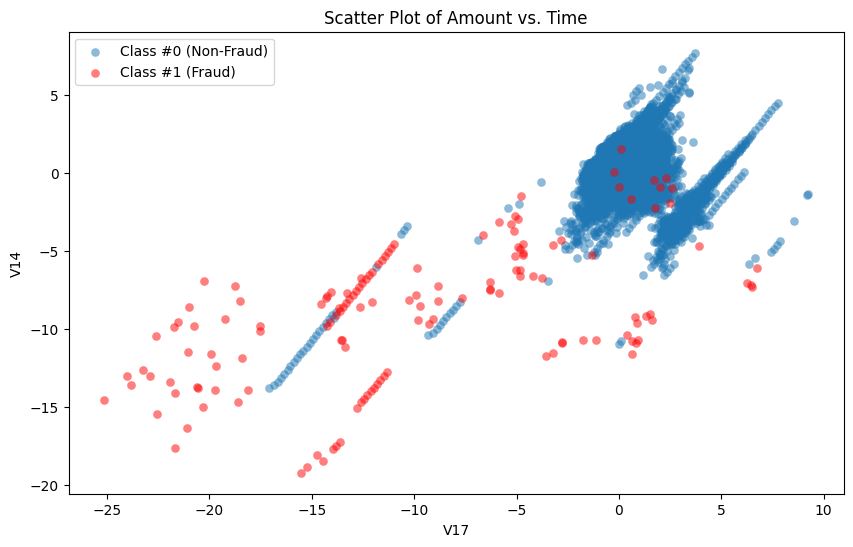

In [25]:
# Highest Negative Correlation and target variable (y)
X = data[['V17', 'V14']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('V17')
plt.ylabel('V14')
plt.title('Scatter Plot of Amount vs. Time')
plt.legend()
plt.show()

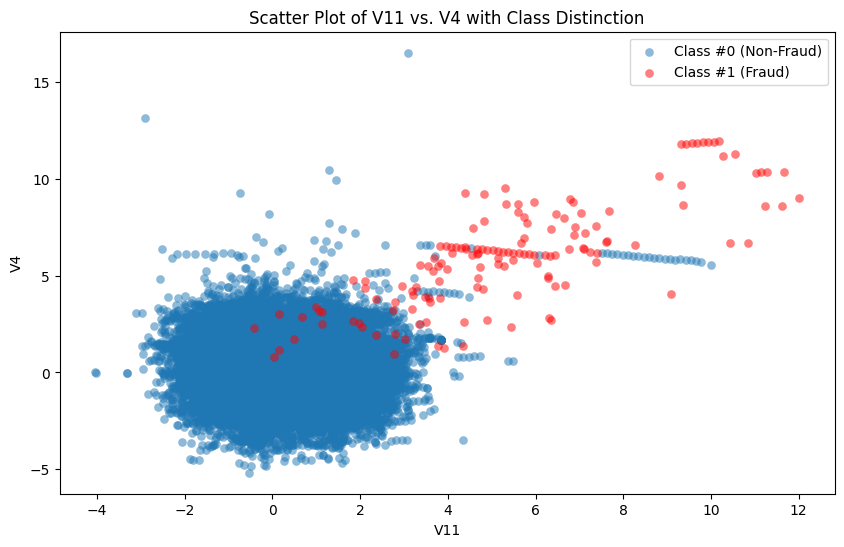

In [26]:
# Highest Positive Correlation and target variable (y)
X = data[['V11', 'V4']].values
y = data['Class'].values

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0 (Non-Fraud)', alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1 (Fraud)', alpha=0.5, linewidth=0.15, c='r')
plt.xlabel('V11')
plt.ylabel('V4')
plt.title('Scatter Plot of V11 vs. V4 with Class Distinction')
plt.legend()
plt.show()

In [28]:
X = data.drop('Class', axis=1)
y = data.Class

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Class'])

In [32]:
print("Class distribution after SMOTE:")

print(y_train_resampled_df['Class'].value_counts())

Class distribution after SMOTE:
0.0    33088
1.0    33088
Name: Class, dtype: int64


In [33]:
Logistic_Regression_Model = LogisticRegression(random_state=42)

In [34]:
Logistic_Regression_Model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
y_pred = Logistic_Regression_Model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     14185
         1.0       0.13      0.95      0.23        41

    accuracy                           0.98     14226
   macro avg       0.57      0.97      0.61     14226
weighted avg       1.00      0.98      0.99     14226



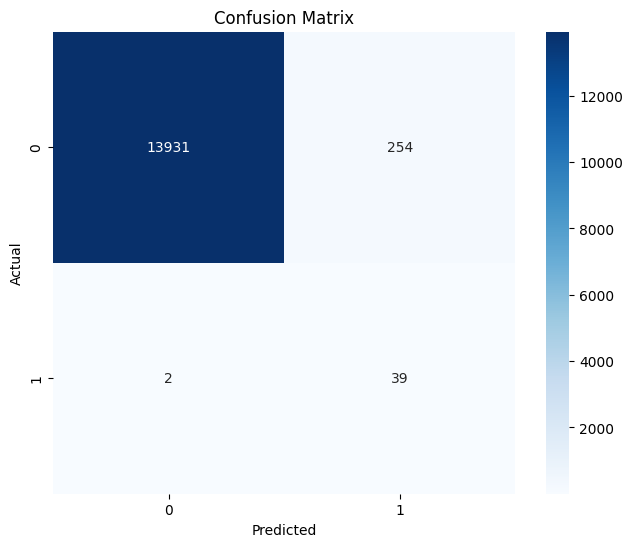

In [37]:
# Calculate the confusion matrix
Logistic_Regression_Model_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Logistic_Regression_Model_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
Radnom_Forest_Model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [39]:
Radnom_Forest_Model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
y_pred=Radnom_Forest_Model.predict(X_test)

In [41]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14185
         1.0       0.95      0.85      0.90        41

    accuracy                           1.00     14226
   macro avg       0.97      0.93      0.95     14226
weighted avg       1.00      1.00      1.00     14226



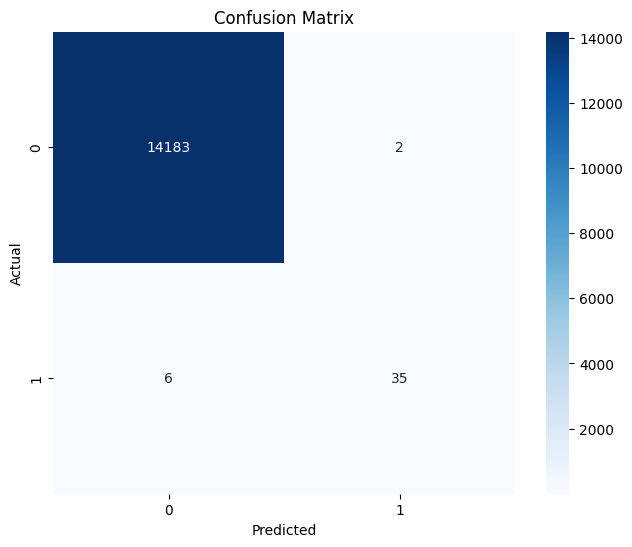

In [42]:
# Calculate the confusion matrix
Random_Forest_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Random_Forest_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()